In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
%matplotlib inline
mpl.rc('figure', figsize=[12,8])  #set the default figure size

from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression

In [3]:
class KNNRegressor(sklearn.base.RegressorMixin):
    
    def __init__(self, k=1):
        self.k = k
        super().__init__()
        
    def fit(self, X,y):
        self.X = X
        self.y = y
        self.nn = NearestNeighbors(n_neighbors=self.k)
        self.nn.fit(X.reshape(-1,1))
        
    def predict(self, T):
        predictions = []
        _, neighbors = self.nn.kneighbors(T)
        regressor = LinearRegression()
        for i in range(T.shape[0]):
            regressor.fit(self.X[neighbors[i]], self.y[neighbors[i]])
            predictions.append(regressor.predict([T[i]]))
        return np.asarray(predictions)
    def set_params(self,k):
        self.k = k

In [4]:
def f_func(x):
        return 3.0 + 4.0 * x - 0.05 * x**2

def generate_data(size=200):
    X = np.sort(np.random.random(size) * 100)
    y = f_func(X) + (np.random.random(size) - 0.5) * 50
    return(X,y)

NameError: name 'LWRegressor' is not defined

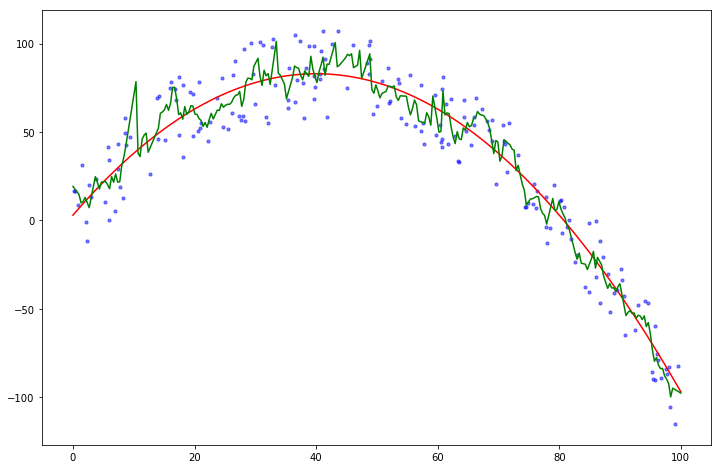

In [5]:
u = np.linspace(0,100,300)
f = f_func(u)
X, y = generate_data()
knn_reg = KNNRegressor(5)
knn_reg.fit(X.reshape(-1,1), y)
predictions = knn_reg.predict(u.reshape(-1,1))

plt.plot(u,f, 'r', label='underlying function')
plt.scatter(X, y, s=10, color='b', alpha=0.5, label='data')
plt.plot(u,predictions, color='g', label='knn linear regression')

X = X.reshape(-1,1)
lwr = LWRegressor(1/40)
lwr.fit(X,y)
predictions = lwr.predict(u.reshape(-1,1))
plt.plot(u,predictions, color='y', label='locally weighted regressor')
plt.legend()

In [6]:
u

array([   0.        ,    0.33444816,    0.66889632,    1.00334448,
          1.33779264,    1.6722408 ,    2.00668896,    2.34113712,
          2.67558528,    3.01003344,    3.34448161,    3.67892977,
          4.01337793,    4.34782609,    4.68227425,    5.01672241,
          5.35117057,    5.68561873,    6.02006689,    6.35451505,
          6.68896321,    7.02341137,    7.35785953,    7.69230769,
          8.02675585,    8.36120401,    8.69565217,    9.03010033,
          9.36454849,    9.69899666,   10.03344482,   10.36789298,
         10.70234114,   11.0367893 ,   11.37123746,   11.70568562,
         12.04013378,   12.37458194,   12.7090301 ,   13.04347826,
         13.37792642,   13.71237458,   14.04682274,   14.3812709 ,
         14.71571906,   15.05016722,   15.38461538,   15.71906355,
         16.05351171,   16.38795987,   16.72240803,   17.05685619,
         17.39130435,   17.72575251,   18.06020067,   18.39464883,
         18.72909699,   19.06354515,   19.39799331,   19.73244

fit example 0


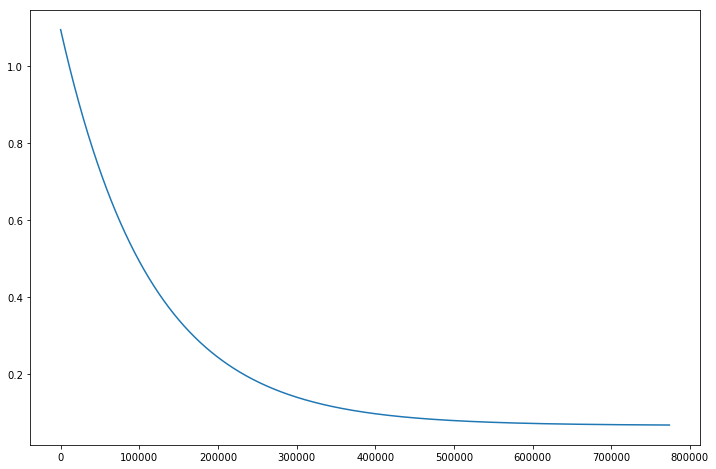

fit example 1


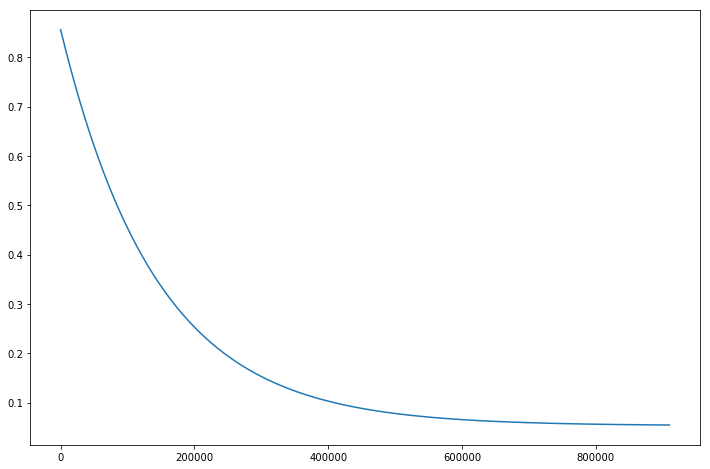

fit example 2


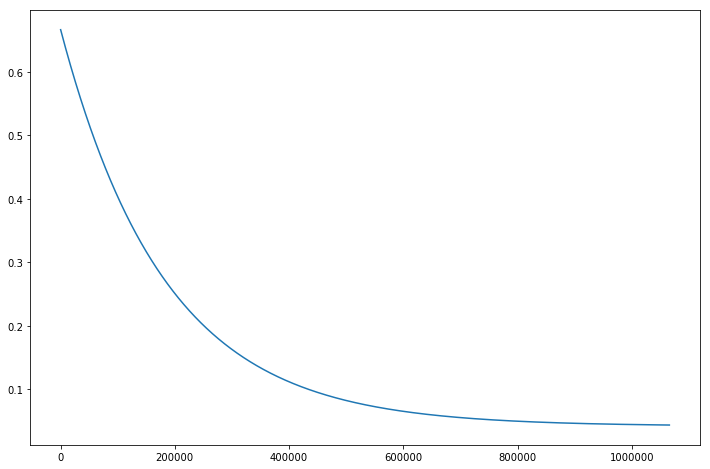

fit example 3


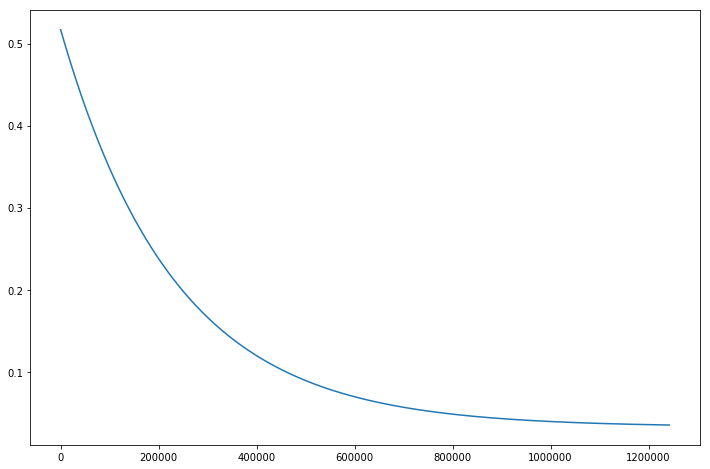

fit example 4


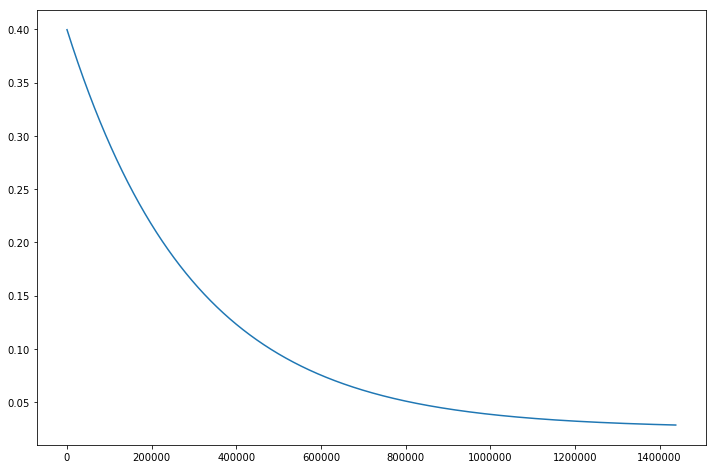

fit example 5


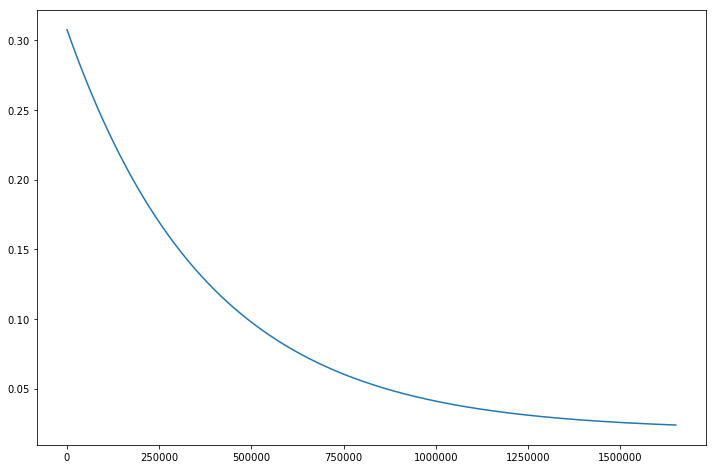

fit example 6


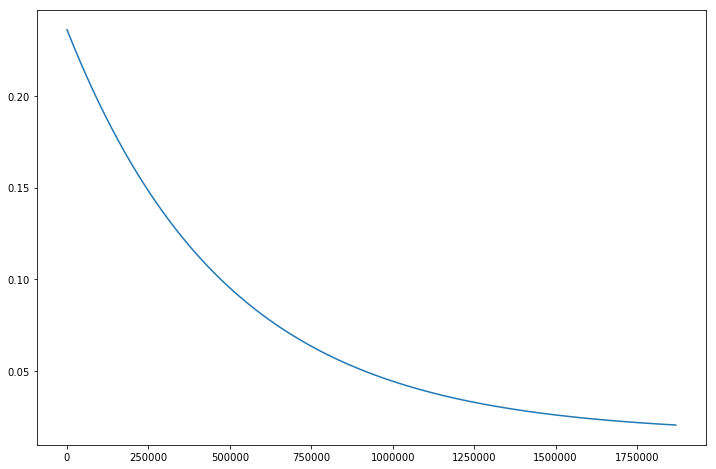

fit example 7


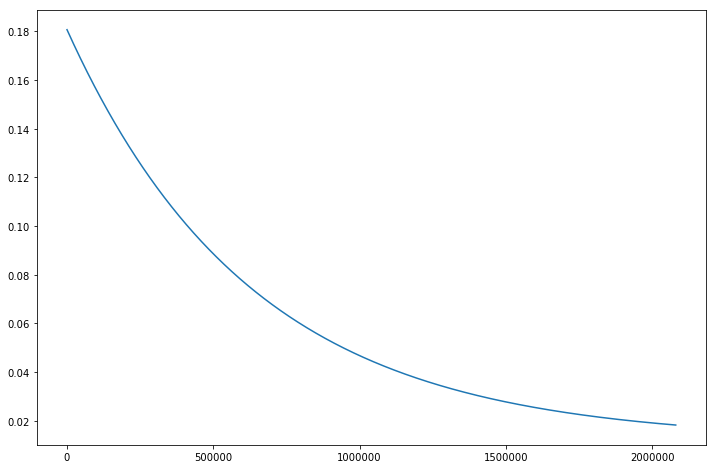

fit example 8


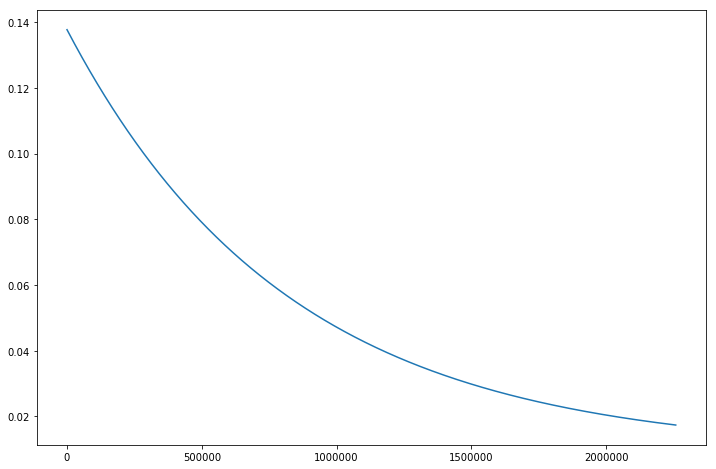

fit example 9


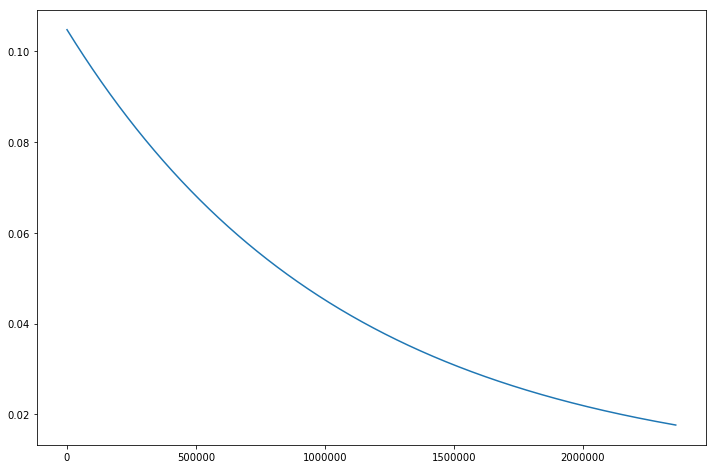

fit example 10


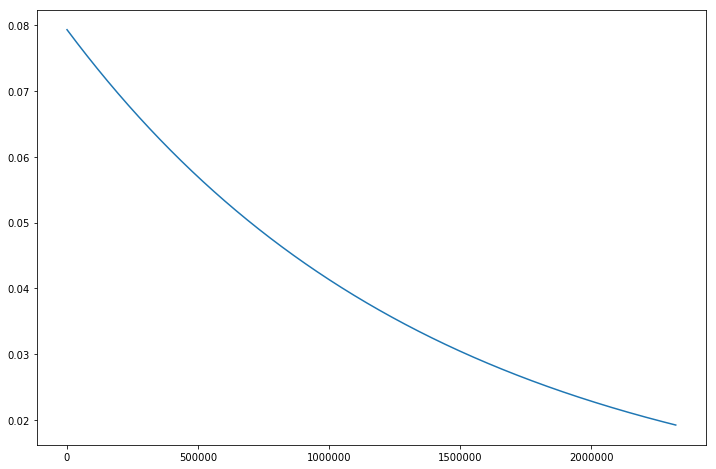

fit example 11


KeyboardInterrupt: 

In [262]:
class LWRegressor():
    # kernel is a function
    def __init__(self, gamma):
        # self.k = k
        self.gamma = gamma

    # X should be of shape (m,n)
    def fit(self, X, y):
        self.m = X.shape[0]
        self.n = X.shape[1]
        self.X_M = np.hstack([[[1], ] * self.m, X])
        self.X = X
        self.y = y
        # self.nn = NearestNeighbors(n_neighbors=self.k)
        # self.nn.fit(X.reshape(-1,1))

    def predict(self, T):
        predictions = []
        for i in range(T.shape[0]):
            print("fit example " + str(i))
            weight_opt = self.findWeight(i,T[i], 1e-2, 1e-8)
            xq = np.hstack([[1], T[i]])
            # print(weight_opt)
            predictions.append(np.matmul(xq, weight_opt))
        return predictions

    # X_M is the matrix that add a column of 1s
    def gradient(self, gamma, w, xq, X, X_M, y):
        xq = np.array([xq] * self.m)
        M_right = np.exp(-gamma * np.sum((xq - X) ** 2, 1).reshape(-1, 1)) * (y.reshape(-1, 1) - np.matmul(X_M, w))
        return np.matmul(X_M.T, M_right)

    def loss(self, w, xq, X, X_M, y):
        xq = np.array([xq] * self.m)
        a = np.exp(-self.gamma * np.sum((xq - X) ** 2, 1).reshape(-1, 1))
        b = (y.reshape(-1, 1) - np.matmul(X_M, w)) ** 2
        return np.sum(a * b)

    # do gradient descent to find the best weight for a query xq
    def findWeight(self,index, xq, alpha, epsilon):
        w = np.zeros((self.n + 1, 1))
        xq = np.hstack([[1], xq])
        loss = []
        l = self.loss(w, xq, self.X, self.X_M, self.y)
        loss.append(l)
        i = 0
        while (True):
            #print(l_prev)
            w += alpha / self.m * self.gradient(self.gamma, w, xq, self.X, self.X_M, self.y)
            l = self.loss(w, xq, self.X, self.X_M, self.y)
            loss.append(l)
            i += 1
            #print(l)
            if (abs(loss[i] - loss[i-1])) <= epsilon:
                break
        plt.plot(range(len(loss)),loss)
        plt.savefig("loss_"+str(index)+".png")
        plt.show()
        return w

u = np.linspace(30,50,60)
f = f_func(u)
X, y = generate_data()
X = X.reshape(-1,1)
lwr = LWRegressor(1/40)
lwr.fit(X,y)
predictions = lwr.predict(u.reshape(-1,1))
#plt.plot(u,f, 'r', label='underlying function')
plt.scatter(X, y, s=10, color='b', alpha=0.5, label='data')
plt.plot(u,predictions, color='g', label='locally weighted regressor')
plt.legend()

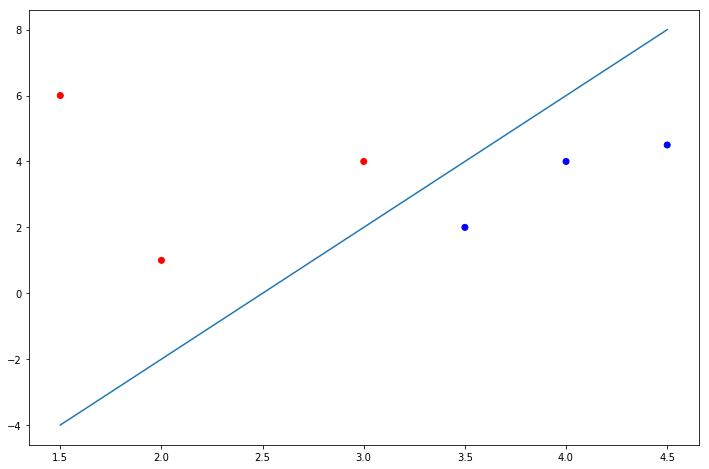

In [379]:
from sklearn.svm import SVC

#(b)
x = np.array([[1.5,6],[2,1],[3,4],[4,4],[3.5,2],[4.5,4.5]])

y = np.array([1,1,1,0,0,0])

clf1 = SVC(C=100,kernel='linear')

clf1.fit(x,y)

xx = np.linspace(1.5,4.5)
a = -clf1.coef_[0][0]/clf1.coef_[0][1]
b = -clf1.intercept_/clf1.coef_[0][1]
yy = a*xx+b
my_color_map = mpl.colors.ListedColormap(['blue', 'red'], 'mycolormap')
plt.scatter(x[:,0],x[:,1],c=y,cmap=my_color_map)
plt.plot(xx,yy)
plt.show()

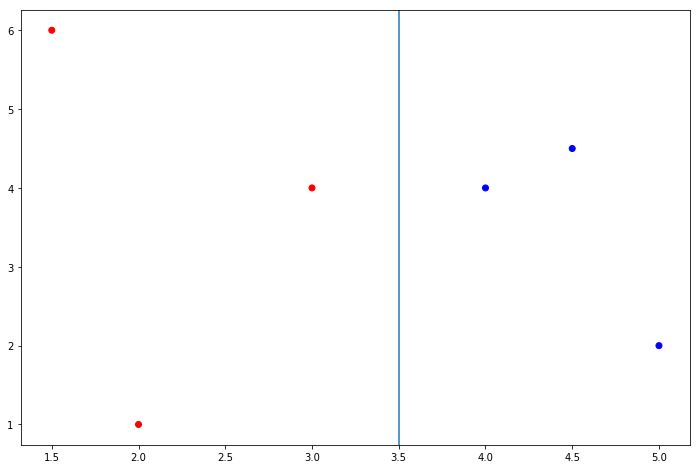

In [380]:
#(c)
x = np.array([[1.5,6],[2,1],[3,4],[4,4],[5,2],[4.5,4.5]])
clf2 = SVC(C=100,kernel='linear')
clf2.fit(x,y)
xx = np.linspace(1.5,4.5)
plt.scatter(x[:,0],x[:,1],c=y,cmap=my_color_map)
plt.axvline(x=-clf2.intercept_/clf2.coef_[0][0])
plt.show()

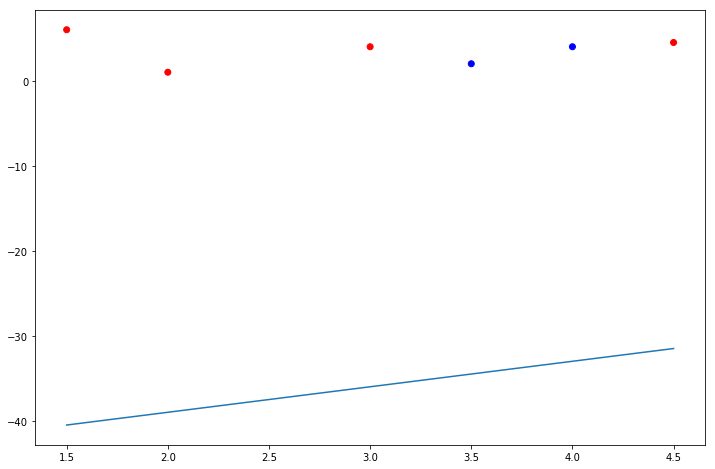

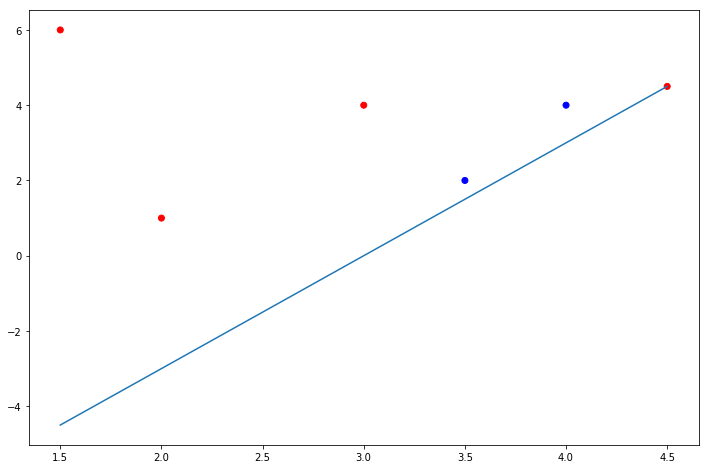

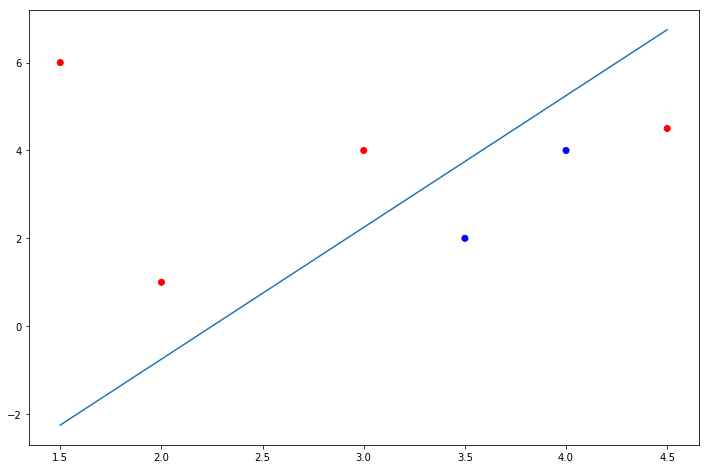

In [381]:
#(d)
x = np.array([[1.5,6],[2,1],[3,4],[4,4],[3.5,2],[4.5,4.5]])
y[5] = 1-y[5]
for c in [0.1,1,10]:
    clf3 = SVC(C=c,kernel='linear')

    clf3.fit(x,y)

    xx = np.linspace(1.5,4.5)
    a = -clf3.coef_[0][0]/clf3.coef_[0][1]
    b = -clf3.intercept_/clf3.coef_[0][1]
    yy = a*xx+b
    my_color_map = mpl.colors.ListedColormap(['blue', 'red'], 'mycolormap')
    plt.scatter(x[:,0],x[:,1],c=y,cmap=my_color_map)
    plt.plot(xx,yy)
    plt.show()

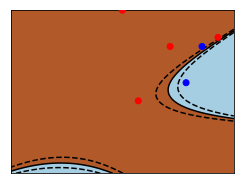

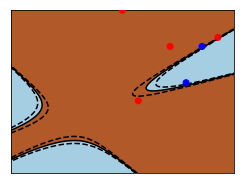

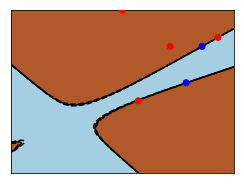

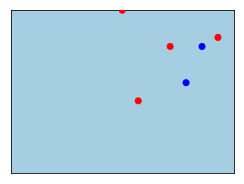

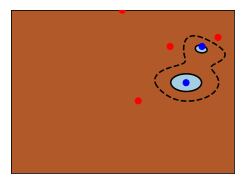

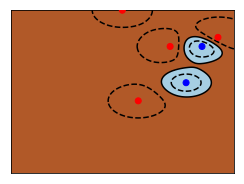

In [257]:
#(e)
fignum = 1
for kernel in ('poly', 'rbf'):
    for c in [0.1,1,10]:
        clf = SVC(C=c,kernel=kernel, gamma=2)
        clf.fit(x, y)

        # plot the line, the points, and the nearest vectors to the plane
        plt.figure(fignum, figsize=(4, 3))
        plt.clf()

        #plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
        #            facecolors='none', zorder=10)
        plt.scatter(x[:, 0], x[:, 1], c=y, zorder=10, cmap=my_color_map)

        plt.axis('tight')
        x_min = -2
        x_max = 5
        y_min = -3
        y_max = 6

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(4, 3))
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1
    plt.show()

In [ ]:
h = .02
for C in [0.1,1,10]:
    rbf_svc = SVC(kernel='rbf', gamma=2, C=C).fit(x, y)
    poly_svc = SVC(kernel='poly', degree = 10,C=C).fit(x, y)

    # create a mesh to plot in
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # title for the plots
    titles = ['SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel']


    for i, clf in enumerate((rbf_svc, poly_svc)):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

    plt.show()

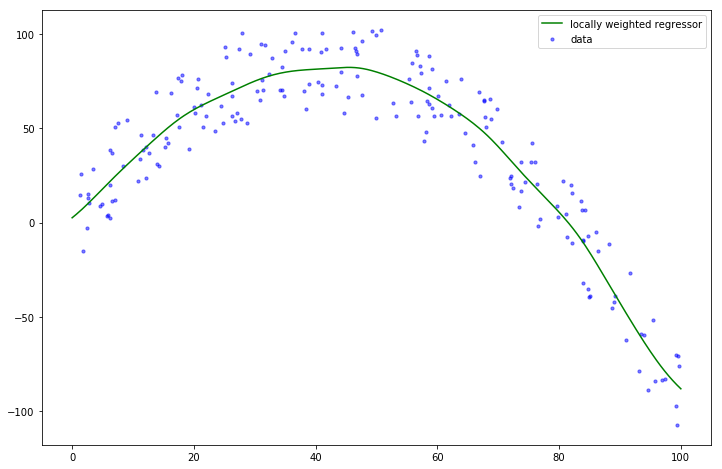

In [303]:
class LWRegressor():
    # kernel is a function
    def __init__(self, gamma=1/40):
        # self.k = k
        self.gamma = gamma

    # X should be of shape (m,n)
    def fit(self, X, y):
        self.X = X
        self.y = y
        # self.nn = NearestNeighbors(n_neighbors=self.k)
        # self.nn.fit(X.reshape(-1,1))

    def predict(self, T):
        predictions = []
        for i in range(T.shape[0]):
            xq = T[i]
            regressor = LinearRegression()
            w = np.exp(-self.gamma*np.sum((self.X-xq)**2,1))
            regressor.fit(self.X,self.y,w)
            predictions.append(regressor.predict([xq]))
        return predictions
    def set_params(self,gamma):
        self.gamma = gamma
    
u = np.linspace(0,100,300)
f = f_func(u)
X, y = generate_data()
X = X.reshape(-1,1)
lwr = LWRegressor(1/40)
lwr.fit(X,y)
predictions = lwr.predict(u.reshape(-1,1))
#plt.plot(u,f, 'r', label='underlying function')
plt.scatter(X, y, s=10, color='b', alpha=0.5, label='data')
plt.plot(u,predictions, color='g', label='locally weighted regressor')
plt.legend()

In [376]:
#3(c) cross validation

from sklearn.model_selection import validation_curve

train_scores1,test_scores1 = validation_curve(KNNRegressor(),X,y,"k",range(1,10),cv=5,scoring='neg_mean_squared_error')

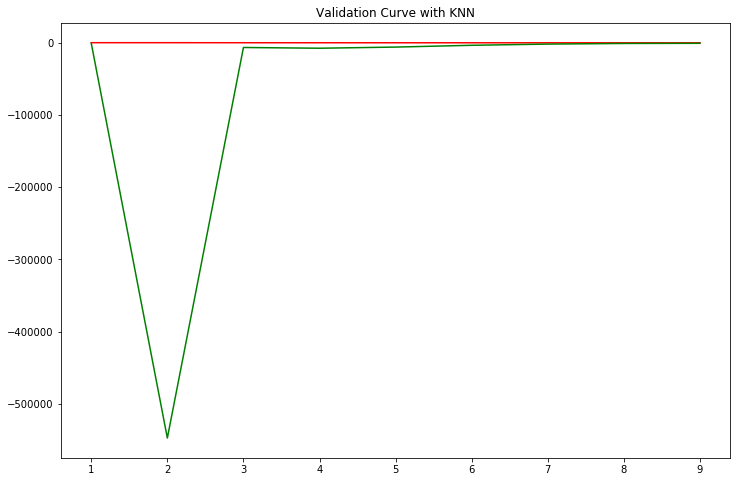

1

In [377]:
train_scores_mean1 = np.mean(train_scores1, axis=1)
train_scores_std1 = np.std(train_scores1, axis=1)
test_scores_mean1 = np.mean(test_scores1, axis=1)
test_scores_std1 = np.std(test_scores1, axis=1)

plt.title("Validation Curve with KNN")
plt.plot(range(1,10),train_scores_mean1,'r')
plt.plot(range(1,10),test_scores_mean1,'g')
plt.show()

range(1,10)[np.argmax(test_scores_mean1)]

In [ ]:
train_scores2,test_scores2 = validation_curve(LWRegressor(),X,y,"gamma",np.arange(0.001,0.2,0.001),cv=5,scoring='neg_mean_squared_error')

train_scores_mean2 = np.mean(train_scores2, axis=1)
train_scores_std2 = np.std(train_scores2, axis=1)
test_scores_mean2 = np.mean(test_scores2, axis=1)
test_scores_std2 = np.std(test_scores2, axis=1)

plt.title("Validation Curve with LWR")
plt.plot(np.arange(0.001,0.2,0.001),train_scores_mean2,'r')
plt.plot(np.arange(0.001,0.2,0.001),test_scores_mean2,'g')
plt.show()

np.arange(0.001,0.2,0.001)[np.argmax(test_scores_mean2)]

$\begin{bmatrix}
x_{i1} \\
x_{i2} \\
x_{i1}x_{i2} \\
x_{i1}^2 \\
x_{i2}^2 \\
x_{i1}^2x_{i2} \\
x_{i2}^2x_{i1} \\
x_{i1}^3 \\
x_{i2}^3
\end{bmatrix}$ $\cdot$
$\begin{bmatrix}
x_{j1} \\
x_{j2} \\
x_{j1}x_{j2} \\
x_{j1}^2 \\
x_{j2}^2 \\
x_{j1}^2x_{j2} \\
x_{j2}^2x_{j1} \\
x_{j1}^3 \\
x_{j2}^3
\end{bmatrix}$
= $x_{i1}x_{j1}+x_{j1}x_{j2}+x_{i1}x_{i2}x_{j1}x_{j2}+x_{i1}^2x_{j1}^2+x_{i2}^2x_{j2}^2+x_{i1}^2x_{i2}x_{j1}^2x_{j2}+
x_{i2}^2x_{i1}x_{j2}^2x_{j1}+x_{i1}^3x_{j1}^3+x_{i2}^3x_{j2}^3$

I recognize that the terms appear here are the same as the terms appear in
$(x_i\cdot x_j+1)^3$ except the term 1

So this function can be the kernel function we use.

In [7]:
nn = NearestNeighbors(n_neighbors=3)
nn.fit(X.reshape(-1,1))

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=3, p=2, radius=1.0)

In [11]:
_,neighbors = nn.kneighbors(u.reshape(-1,1))